In [3]:
import numpy as np
from scipy import integrate as integ
from scipy import signal as signal
import sympy as sp
import matplotlib
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets
from tqdm import tqdm

In [4]:
from turing_model import TuringModel as tm

Text(0.5, 0.98, '$k1 = $5, $k2 = $0, $dHmax1 = dHmax2 = $0.01. All graphs show the same time series.')

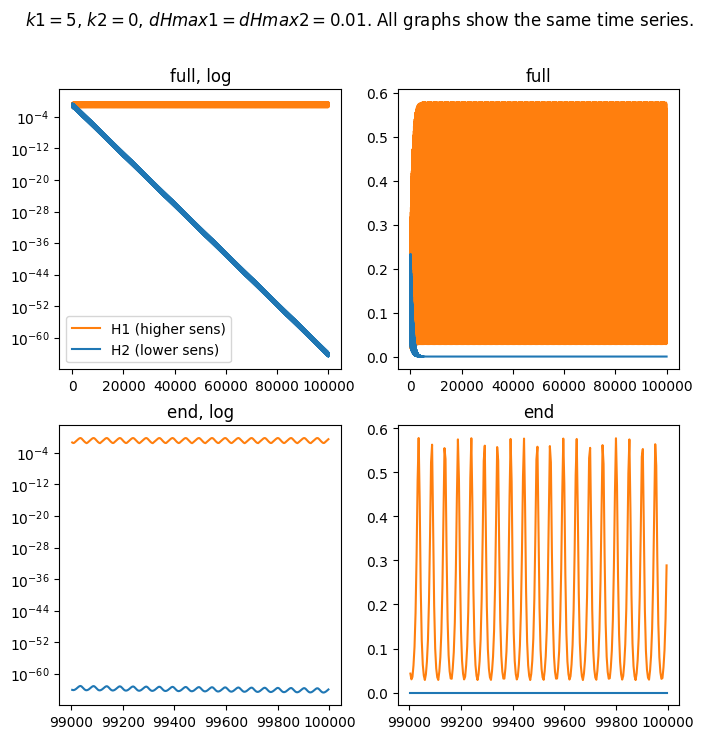

In [5]:
t_end = 100000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 5
k_2 = 0
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))


fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4")
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4")
ax3.set_title("end, log")
ax3.plot(t[-250:-1], (var[-250:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-250:-1], (var[-250:-1:, 6]), color="#1F77B4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-250:-1], (var[-250:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-250:-1], (var[-250:-1:, 6]), color="#1F77B4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + ". All graphs show the same time series.")